In [1]:
from keras import models, layers, losses, optimizers, metrics
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
train_dir = '/media/shuvendu/Projects/Datasets/bangla/train'
test_dir = '/media/shuvendu/Projects/Datasets/bangla/test'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(64, 64), 
    batch_size=32
)

test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(64, 64), 
    batch_size=32
)

Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.


In [4]:
for data_batch, label_batch in train_generator:
    print(data_batch.shape)
    print(label_batch.shape)
    break

(32, 64, 64, 3)
(32, 50)


# Deep neural network

In [19]:
model = models.Sequential()

model.add(layers.Flatten(input_shape=(64, 64, 3)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(50, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              12583936  
_________________________________________________________________
dense_10 (Dense)             (None, 50)                51250     
Total params: 12,635,186
Trainable params: 12,635,186
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=375, 
                              epochs=30, 
                              validation_data=test_generator, 
                              validation_steps=95)

Epoch 1/30
375/375 [==============================] - 6s - loss: 3.0744 - categorical_accuracy: 0.2232 - val_loss: 2.5420 - val_categorical_accuracy: 0.3259
Epoch 2/30
375/375 [==============================] - 5s - loss: 2.0645 - categorical_accuracy: 0.4482 - val_loss: 1.9759 - val_categorical_accuracy: 0.4898
Epoch 3/30
375/375 [==============================] - 5s - loss: 1.7460 - categorical_accuracy: 0.5297 - val_loss: 1.9024 - val_categorical_accuracy: 0.4908
Epoch 4/30
375/375 [==============================] - 5s - loss: 1.5648 - categorical_accuracy: 0.5757 - val_loss: 1.8918 - val_categorical_accuracy: 0.5059
Epoch 5/30
375/375 [==============================] - 5s - loss: 1.4262 - categorical_accuracy: 0.6111 - val_loss: 1.7281 - val_categorical_accuracy: 0.5472
Epoch 6/30
375/375 [==============================] - 5s - loss: 1.3202 - categorical_accuracy: 0.6362 - val_loss: 1.8195 - val_categorical_accuracy: 0.5168
Epoch 7/30
375/375 [==============================] - 5s -

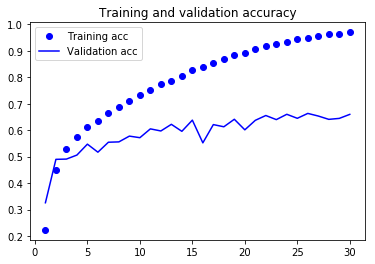

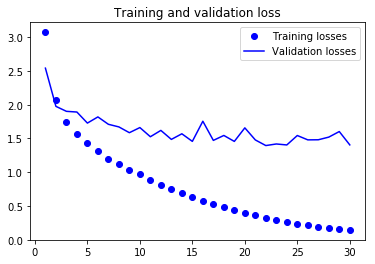

In [21]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Convolutional neural network

In [22]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(50, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 4608)              0         
__________

In [23]:
# Compile the model
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

In [24]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=375, 
                              epochs=30, 
                              validation_data=test_generator, 
                              validation_steps=95)

Epoch 1/30
375/375 [==============================] - 5s - loss: 2.7814 - categorical_accuracy: 0.2992 - val_loss: 1.8998 - val_categorical_accuracy: 0.5016
Epoch 2/30
375/375 [==============================] - 4s - loss: 1.3880 - categorical_accuracy: 0.6298 - val_loss: 1.1325 - val_categorical_accuracy: 0.6883
Epoch 3/30
375/375 [==============================] - 4s - loss: 0.8116 - categorical_accuracy: 0.7746 - val_loss: 0.7786 - val_categorical_accuracy: 0.7823
Epoch 4/30
375/375 [==============================] - 4s - loss: 0.5396 - categorical_accuracy: 0.8481 - val_loss: 0.6740 - val_categorical_accuracy: 0.8127
Epoch 5/30
375/375 [==============================] - 4s - loss: 0.3712 - categorical_accuracy: 0.8952 - val_loss: 0.5968 - val_categorical_accuracy: 0.8282
Epoch 6/30
375/375 [==============================] - 4s - loss: 0.2525 - categorical_accuracy: 0.9290 - val_loss: 0.5363 - val_categorical_accuracy: 0.8555
Epoch 7/30
375/375 [==============================] - 5s -

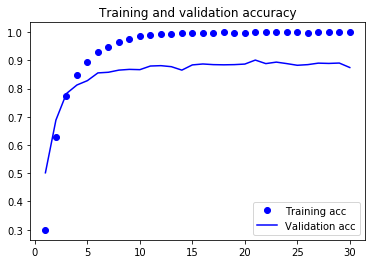

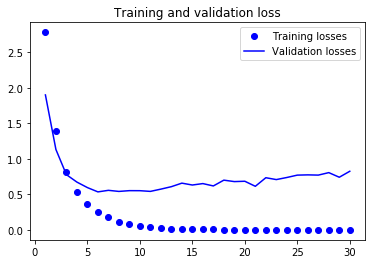

In [25]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# LSTM

In [31]:
model = models.Sequential()

model.add(layers.Reshape((64, 64*3), input_shape=(64, 64, 3)))
model.add(layers.LSTM(500, dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Dense(50, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 64, 192)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 500)               1386000   
_________________________________________________________________
dense_15 (Dense)             (None, 50)                25050     
Total params: 1,411,050
Trainable params: 1,411,050
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

In [ ]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=375, 
                              epochs=30, 
                              validation_data=test_generator, 
                              validation_steps=95)

Epoch 1/30
375/375 [==============================] - 22s - loss: 3.6374 - categorical_accuracy: 0.0865 - val_loss: 3.1521 - val_categorical_accuracy: 0.1906
Epoch 2/30
375/375 [==============================] - 20s - loss: 2.9806 - categorical_accuracy: 0.2116 - val_loss: 2.6648 - val_categorical_accuracy: 0.2853
Epoch 3/30
375/375 [==============================] - 21s - loss: 2.6412 - categorical_accuracy: 0.2837 - val_loss: 2.2834 - val_categorical_accuracy: 0.3648
Epoch 4/30
375/375 [==============================] - 20s - loss: 2.4022 - categorical_accuracy: 0.3362 - val_loss: 1.9983 - val_categorical_accuracy: 0.4453
Epoch 5/30
375/375 [==============================] - 20s - loss: 2.1680 - categorical_accuracy: 0.4026 - val_loss: 1.7948 - val_categorical_accuracy: 0.4894
Epoch 6/30
375/375 [==============================] - 20s - loss: 1.9771 - categorical_accuracy: 0.4557 - val_loss: 1.6321 - val_categorical_accuracy: 0.5392
Epoch 7/30
375/375 [==============================] 

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Try using pretrained model (VGG16 on imagenet)
using imagenet dataset is not an ideal case. But give it a shot and see how the low level feature deection help

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(64, 64, 3))

In [ ]:
conv_base.summary()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(64, 64), 
    batch_size=32
)

test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(64, 64), 
    batch_size=32
)

In [ ]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(50, activation='softmax'))
model.summary()

In [ ]:
conv_base.trainable = False
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

In [ ]:
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

In [ ]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=375, 
                              epochs=10, 
                              validation_data=test_generator, 
                              validation_steps=95)

# Fine-tuning
As the pretrained model improves the accuracy. let's try fine tuning it for the last blocks

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=375, 
                              epochs=10, 
                              validation_data=test_generator, 
                              validation_steps=95)

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Conclusion

With the pretrained vgg26 model validation accuracy upto 92% is achieved